# Intro to `pandas` for machine learning

We'll explore the Pandas package for simple data handling tasks using geoscience data examples. 

Introduces the concept of a `DataFrame` in Python. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels.

In [1]:
import pandas as pd

The most common data structure in Pandas is the `DataFrame`. A 2D structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays). Columns are usually labelled as well using strings.

An easy way to think about a `DataFrame` is if you imagine it as an Excel spreadsheet.

Let's define one using a small dataset:

In [70]:
data =  [[2.13, 'sandstone'],
         [3.45, 'limestone'],
         [2.45, 'shale']]
data

[[2.13, 'sandstone'], [3.45, 'limestone'], [2.45, 'shale']]

Make a `DataFrame` from `data`

In [71]:
df = pd.DataFrame(data, columns=['velocity', 'lithology'])
df

,velocity,lithology
0,2.13,sandstone
1,3.45,limestone
2,2.45,shale


Accessing the data is a bit more complex than in the numpy array cases but for good reasons

In [72]:
df['lithology']

0    sandstone
1    limestone
2        shale
Name: lithology, dtype: object

In [73]:
df[0]  # Can't get at rows like this.

KeyError: 0

In [74]:
df.loc[0:1]  # Inclusive slice, unlike anything else in Python or NumPy

,velocity,lithology
0,2.13,sandstone
1,3.45,limestone


In [75]:
df['id'] = [101, 102, 103]
df = df.set_index('id')
df.head()

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone
103,2.45,shale


In [76]:
df.loc[0]

KeyError: 0

In [77]:
df.iloc[0:1]  # Works like NumPy, rarely needed

,velocity,lithology
id,,
101,2.13,sandstone


In [78]:
df.loc[df['velocity'] < 3]  # Loc provides *selectors* like NumPy arrays.

,velocity,lithology
id,,
101,2.13,sandstone
103,2.45,shale


In [79]:
df.loc[df['velocity'] < 3, 'lithology']  # Both rows and columns.


id
101    sandstone
103        shale
Name: lithology, dtype: object

## Adding data

Add more data (row wise)

In [80]:
df.loc[99] = [3.5, 'dolomite']

In [81]:
df.loc[3] = [2.6, 'shale']
df

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone
103,2.45,shale
99,3.50,dolomite
3,2.60,shale


Add a new column with a "complete" list, array or series

In [82]:
df['new_column'] = ["x", "y", "z", "a", "b"]
df

,velocity,lithology,new_column
id,,,
101,2.13,sandstone,x
102,3.45,limestone,y
103,2.45,shale,z
99,3.50,dolomite,a
3,2.60,shale,b


## Column types

It's especially worth checking that your numbers are actually numbers (eg floats or ints), because they look the same as strings in the various renderings of DataFrames and Series.

In [83]:
s = pd.Series([23, '23'])
s

0    23
1    23
dtype: object

In [84]:
s * 2

0      46
1    2323
dtype: object

Our DataFrame is not too bad already...

In [85]:
df.dtypes

velocity      float64
lithology      object
new_column     object
dtype: object

It makes sense to use the [Pandas `categorical` type](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) for categorical variables. Let's do that:

In [87]:
cols = ['lithology', 'new_column']
df[cols] = df[cols].apply(pd.Categorical)

df.dtypes

velocity       float64
lithology     category
new_column    category
dtype: object

## Reading a CSV

Pandas also reads files from disk in tabular form ([here](http://pandas.pydata.org/pandas-docs/version/0.20/io.html)'s a list of all the formats that it can read and write). A very common one is CSV, so let's load one!

The data is the same as used in this study: http://www.kgs.ku.edu/PRS/publication/2003/ofr2003-30/index.html

From that poster:

> The Panoma Field (2.9 TCF gas) produces from Permian Council Grove Group marine carbonates and nonmarine silicilastics in the Hugoton embayment of the Anadarko Basin. It and the Hugoton Field, which has produced from the Chase Group since 1928, the top of which is 300 feet shallower have combined to produce 27 TCF gas, making it the largest gas producing area in North America. Both fields are stratigraphic traps with their updip west and northwest limits nearly coincident. Maximum recoveries in the Panoma are attained west of center of the field. Deeper production includes oil and gas from Pennsylvanian Lansing-Kansas City, Marmaton, and Morrow and the Mississippian.

In [1]:
import pandas as pd

In [150]:
# THIS CELL PREPARES THE DATASET FROM SEG's GITHUB.
# Most of the data (Hall's training data).
dg = pd.read_csv("https://raw.githubusercontent.com/seg/2016-ml-contest/master/facies_vectors.csv")
dg = dg.rename(columns={'NM_M': 'Marine', 'RELPOS': 'RelPos'})
dg['ILD'] = 10**dg['ILD_log10']
dg['Depth'] = dg['Depth'] * 0.3048
cols = ['Well Name', 'Depth', 'Formation', 'RelPos', 'Marine', 'GR', 'ILD',
       'DeltaPHI', 'PHIND', 'PE', 'Facies']
dg = dg[cols]
dg = dg.loc[dg['Well Name'] != 'Recruit F9']

# STUART and CRAWFORD log data (test data).
di = pd.read_csv("https://raw.githubusercontent.com/seg/2016-ml-contest/master/nofacies_data.csv")
di = di.rename(columns={'NM_M': 'Marine', 'RELPOS': 'RelPos'})
di['ILD'] = 10**di['ILD_log10']
di = di[cols[:-1]]

# Labels are in another file.
dh = pd.read_csv("https://raw.githubusercontent.com/seg/2016-ml-contest/master/blind_stuart_crawford_core_facies.csv")
dh.loc[dh['WellName'] == 'CRAWFORD']
dh['Facies'] = dh['LithCode']

# Merge them.
df = pd.merge(
    left=di,
    right=dh,
    left_on=['Well Name', 'Depth'],
    right_on=['WellName', 'Depth.ft'],
    how='left',
).drop(columns=['WellName', 'Depth.ft', 'LithLabel', 'LithCode'])
df['Depth'] = df['Depth'] * 0.3048
df.Facies[df.Facies == 11] = 1
df.Marine -= 1

# Concatenate and save.
de = pd.concat([dg, df])
de = de[~de['Well Name'].isin(['ALEXANDER D', 'KIMZEY A'])]
de = de.reset_index().drop(columns=['index'])
# de.to_csv('/local/S3/geocomp/data/Panoma_Field_Permian_data.csv', index=False)
de

/tmp/ipykernel_116526/2019429661.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Facies[df.Facies == 11] = 1


,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.450,4.613176,9.900,11.915,4.600,3.0
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.260,4.581419,14.200,12.565,4.100,3.0
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.050,4.549881,14.800,13.050,3.600,3.0
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.100,4.518559,13.900,13.115,3.500,3.0
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.580,4.436086,13.500,13.300,3.400,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3989,CRAWFORD,962.7108,C SH,0.639,0,86.078,3.580964,5.040,16.150,3.161,2.0
3990,CRAWFORD,962.8632,C SH,0.611,0,88.855,3.459394,5.560,16.750,3.118,2.0
3991,CRAWFORD,963.0156,C SH,0.583,0,90.490,3.388442,6.360,16.780,3.168,2.0
3992,CRAWFORD,963.1680,C SH,0.556,0,90.975,3.326596,7.035,16.995,3.154,2.0


In [200]:
df = pd.read_csv("https://geocomp.s3.amazonaws.com/data/Panoma_Field_Permian_data.csv")
df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0


### EXERCISE

- Have a look at the dataset.
- Check out `df.describe()`. Notice any red flags?
- How many wells are there?

In [155]:
df.describe()

,Depth,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3973.000000
mean,882.754258,0.524739,1.319479,64.729111,5.239220,3.448725,13.108452,3.680742,4.467405
std,40.201202,0.286733,0.592622,30.267402,3.189044,4.956671,7.334934,0.820622,2.405674
min,784.402800,0.010000,0.000000,12.036000,0.340408,-21.832000,0.550000,0.200000,1.000000
25%,858.012000,0.281000,1.000000,45.450000,3.169567,1.000000,8.200000,3.118250,2.000000
50%,888.492000,0.530500,1.000000,64.934000,4.300315,3.235000,11.792500,3.505000,4.000000
75%,913.028400,0.774000,2.000000,78.818250,6.652732,6.100000,16.100000,4.238250,6.000000
max,963.320400,1.000000,2.000000,361.150000,32.136605,18.600000,84.400000,8.094000,9.000000


In [171]:
# There are NaNs in the Facies column:
df[df['Facies'].isna()]

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies
3180,STUART,858.3168,A1 SH,0.644,0,65.126,3.981072,3.300,10.550,2.914,NaN
3196,STUART,860.7552,A1 SH,0.244,0,76.566,4.613176,10.700,11.550,3.381,NaN
3310,STUART,878.1288,B1 SH,0.129,0,72.690,3.614099,4.800,18.500,2.969,NaN
3360,STUART,885.7488,B2 SH,0.211,0,78.068,4.111497,5.000,18.100,3.252,NaN
3453,STUART,899.9220,B4 LM,0.214,1,36.313,14.757065,-3.300,6.950,3.970,NaN
3465,STUART,901.7508,B5 LM,0.854,1,25.957,1.552387,-2.400,19.900,4.294,NaN
3476,STUART,903.4272,B5 LM,0.561,1,45.125,3.213661,2.300,8.450,4.248,NaN
3490,STUART,905.5608,B5 LM,0.195,1,92.886,4.246196,-0.200,9.400,4.272,NaN
3505,STUART,907.8468,C SH,0.814,0,79.896,2.864178,14.900,20.150,3.423,NaN
3515,STUART,909.3708,C SH,0.558,0,81.895,2.697739,14.200,16.800,3.441,NaN


In [201]:
df = df.dropna()

In [173]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'NEWBY', 'CHURCHMAN BIBLE', 'STUART', 'CRAWFORD'], dtype=object)

We have some well logs, plus...

> Two other feature elements derived from other geologic data are geologic constraining variables (GCV), nonmarine-marine (NM-M) and relative position (RPos). NM-M is determined from formation tops and bases and RPos is the position of a particular sample with respect to the base of its respective nonmarine or marine interval. These two important variables help to incorporate geologic knowledge into the variable mix.

### EXERCISE

We also have well headers in a file called `https://geocomp.s3.amazonaws.com/data/Panoma_well_headers.csv`. Load this dataframe (don't call it `df`!).

Make a map of the locations. <a title="Try DataFrame.plot.scatter()"><b>HINT</b></a>

Stretch goal: can you add the (lon, lat) locations of the wells to the dataframe above? There are lots of ways to do this, one way is to use [`df.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [174]:
# YOUR CODE HERE



In [204]:
dh = pd.read_csv("https://geocomp.s3.amazonaws.com/data/Panoma_well_headers.csv")
dh

,NAME,LEASE,WELL,API_NUMBER,LATITUDE,LONGITUDE
0,SHRIMPLIN,Shrimplin Gas Unit,2HI,15-055-21045,37.978076,-100.987305
1,NOLAN,Nolan,4-16,15-055-20824,37.781202,-101.047447
2,SHANKLE,Shankle,2-9,15-093-21250,38.063373,-101.389189
3,LUKE G U,Luke Gas Unit,4,15-187-20661,37.449961,-101.612191
4,NEWBY,Newby,1,15-189-10106,37.325960,-101.325130
5,KIMZEY,Kimzey,1,15-189-00588,37.105629,-101.312229
6,ALEXANDER,Alexander 'D',2,15-067-20338,37.674726,-101.167526
7,CHURCHMAN BIBLE,Churchman Bible,2,15-189-20982,37.356426,-101.106045
8,CROSS H CATTLE,Cross H Cattle Co,1-6,15-075-20543,37.910583,-101.646452
9,STUART,Stuart,5-27,15-067-20856,37.500380,-101.129860


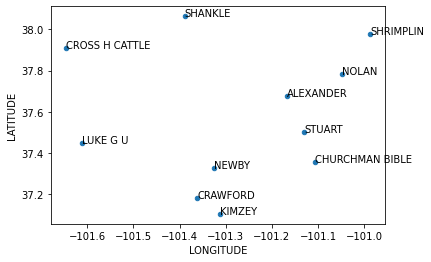

In [206]:
ax = dh.plot.scatter('LONGITUDE', 'LATITUDE')

for k, v in dh.iterrows():
    ax.annotate(v['NAME'], v[['LONGITUDE', 'LATITUDE']])

In [203]:
df = pd.merge(
    left=df,
    right=dh,
    left_on='Well Name',
    right_on='NAME',
    how='left',
).drop(columns=['NAME', 'LEASE', 'WELL', 'API_NUMBER'])
df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305


## Distributions

The ILD log seems to have skwed statistics; let's take a look at it.

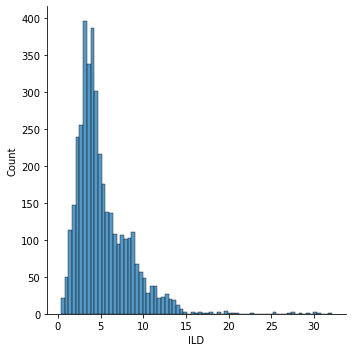

In [207]:
import seaborn as sns
import numpy as np

sns.displot(df['ILD'])

### Exercise

- Create a new column called `ILD_log10` and store in it the log<sub>10</sub> of the values in column `ILD`.
- Make a 'displot' of the new column.
- Check the Pandas documentation [here](http://pandas.pydata.org/pandas-docs/version/0.22/api.html#data-manipulations) and look for a way to determine how many different facies are part of the `DataFrame`.

In [209]:
import numpy as np

df['ILD_log10'] = np.log10(df["ILD"])

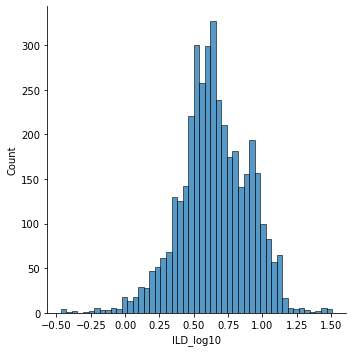

In [210]:
sns.displot(df['ILD_log10'])

In [211]:
df.groupby('Facies').size()

Facies
1.0    282
2.0    849
3.0    744
4.0    271
5.0    272
6.0    628
7.0    190
8.0    638
9.0     99
dtype: int64

## More features

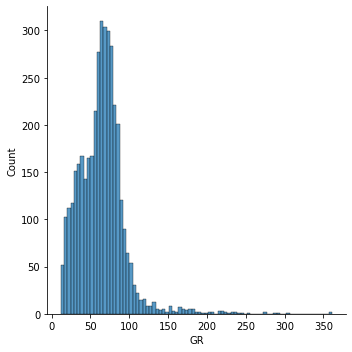

In [212]:
sns.displot(df['GR'])

In [213]:
df['GR'] = df['GR'].clip(upper=200)

## Better descriptions

We can define a Python dictionary to relate facies with the integer label on the `DataFrame`. These are from the original paper:

```
lithologies = {1:'sandstone', 2:'c_siltstone', 3:'f_siltstone',
               4:'marine_silt_shale',
               5:'mudstone', 6:'wackestone', 7:'dolomite',
               8:'packstone', 9:'bafflestone',
              }
```

But let's use a simplified version:

In [214]:
lithologies = {1:'sandstone',
               2:'siltstone', 3:'siltstone',
               4:'mudstone', 5:'mudstone',
               6:'wackestone',
               7:'dolomite',
               8:'limestone', 9:'limestone',
              }

Let's add a new column with the name version of the facies. There is a `replace()` method on DataFrames and Series, and it takes a dictionary for what to replace with what. So we could also achieve the same thing by passing our dictionary to that.

In [215]:
df["Lithology"] = df["Facies"].replace(lithologies)

df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,Lithology
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305,0.664,siltstone
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305,0.661,siltstone
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305,0.658,siltstone
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305,0.655,siltstone
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305,0.647,siltstone


## Adding more data to the `DataFrame`

We'd like to augment the DataFrame with some new data, based on some of the existing data.

In [216]:
def calc_phi_rhob(phind, deltaphi):
    """
    Compute phi_RHOB from phi_ND and delta-phi.
    """
    return 2 * (phind/100) / (1 - deltaphi/100) - deltaphi/100

In [217]:
def calc_rhob(phi_rhob, rho_matrix=2650, rho_fluid=1100):
    """
    Computes RHOB from phi_RHOB using some typical values.
    """   
    return rho_matrix * (1 - phi_rhob) + rho_fluid * phi_rhob

### Exercise

- Create a new column called `RHOB` and use the functions `calc_phi_rhob` and `calc_rhob` with the appropriate arguments to produce to fill its values. Assume everything is sandstone.
- Check the distribution of the new RHOB values. Sedimentary rocks usually have densities in the range 2000 to 2500 kg/m³. Some of these seem rather small. Use `df.loc[...]` (with a condition in place of the ellipsis) to make a copy of the DataFrame that only includes the values above some reasonable number, maybe 1500 kg/m³.

In [218]:
# YOUR CODE HERE



In [219]:
phi_rhob = calc_phi_rhob(df['PHIND'], df['DeltaPHI'])
df['RHOB'] = calc_rhob(phi_rhob)

In [220]:
df.describe()

,Depth,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,RHOB
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000
mean,882.607281,0.525195,1.324440,64.420341,5.237827,3.448315,13.108890,3.681915,4.467405,37.632964,-101.295314,0.648739,2283.211838
std,40.212270,0.286627,0.589177,28.432663,3.188213,4.955186,7.343115,0.821605,2.405674,0.299407,0.230613,0.251347,240.653056
min,784.402800,0.010000,0.000000,12.036000,0.340408,-21.832000,0.550000,0.200000,1.000000,37.180732,-101.646452,-0.468000,11.204082
25%,857.859600,0.282000,1.000000,45.387000,3.169567,1.000000,8.200000,3.119000,2.000000,37.356426,-101.389189,0.501000,2197.583122
50%,888.339600,0.532000,1.000000,64.883000,4.295364,3.264000,11.790000,3.512000,4.000000,37.500380,-101.325130,0.633000,2342.062643
75%,913.028400,0.774000,2.000000,78.830000,6.652732,6.110000,16.080000,4.241000,6.000000,37.910583,-101.106045,0.823000,2434.118984
max,963.320400,1.000000,2.000000,200.000000,32.136605,18.600000,84.400000,8.094000,9.000000,38.063373,-100.987305,1.507000,2802.871147


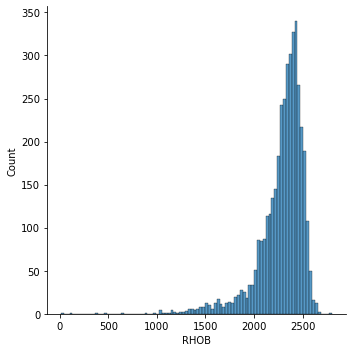

In [221]:
sns.displot(df['RHOB'])

In [222]:
# Ditch really low values...
df = df.loc[df['RHOB'] > 1000]

In [223]:
# AND then clip.
df['RHOB'] = df['RHOB'].clip(lower=1500)

/tmp/ipykernel_116526/3369221261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RHOB'] = df['RHOB'].clip(lower=1500)


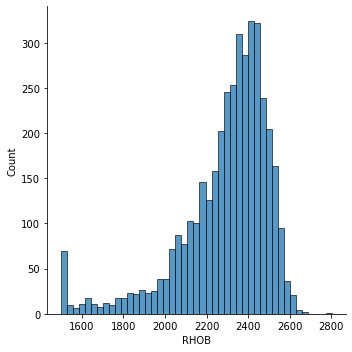

In [224]:
sns.displot(df['RHOB'])

### STRETCH EXERCISE

Create a function that processes a row, taking `row` as its only argument. Then use `row['Facies']` to get the matrix (the geological one!) and use that to make the calculation for each row, returning it. Then you can use `df.apply()` with `axis=1` to apply your function to every row and make a new column. Use this dictionary to look up the matrix type:

In [23]:
def calc_rhob(phi_rhob, matrix='sandstone', fluid='brine'):
    """
    Computes RHOB from phi_RHOB using some typical values for rho_matrix,
    and rho_fluid. See wiki.aapg.org/Density-neutron_log_porosity
    """
    matrixes = {
        'mudstone':   2350,
        'siltstone':  2550,
        'sandstone':  2650,
        'limestone':  2710,
        'dolomite':   2880,
        'anyhydrite': 2980,
        'salt':       2030,
    }

    fluids = {
        'water':       1000,
        'brine':       1100,
        'heavy oil':   1000,
        'light oil':    800,
        'lng':          650,
    }
    
    rho_matrix = matrixes.get(matrix.lower(), 2650)
    rho_fluid = fluids.get(fluid.lower(), 1100)
    return rho_matrix * (1 - phi_rhob) + rho_fluid * phi_rhob

In [25]:
def get_rhob(row):
    phi_rhob = calc_phi_rhob(row['PHIND'], row['DeltaPHI'])
    return calc_rhob(phi_rhob, matrix=row['Lithology'])

df['RHOB'] = df.apply(get_rhob, axis=1)

There are other ways to achieve this sort of thing: `assign()`, `transform()`, `map()` and `applymap()` are various similar methods on DataFrames and Series.

## Visual exploration of the data

Pandas has a `scatter_matrix()` function, but it's not that pretty.

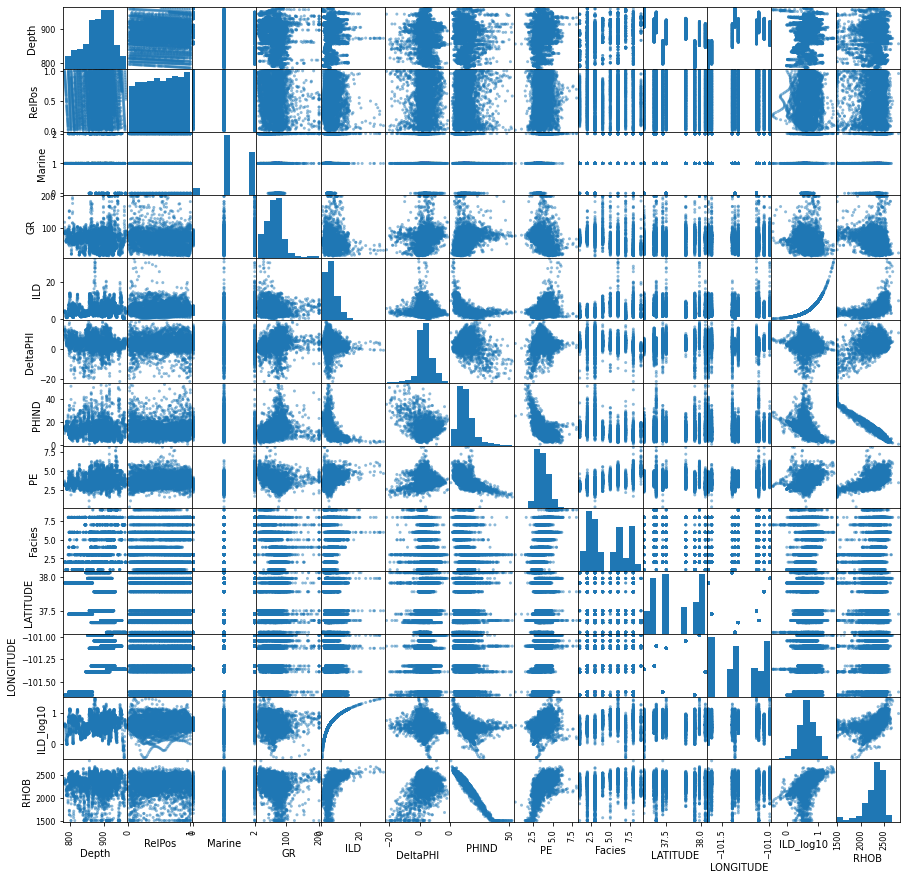

In [225]:
_ = pd.plotting.scatter_matrix(df, figsize=(15,15))

We can better visualize the properties of each facies and how they compare using Seaborn's `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

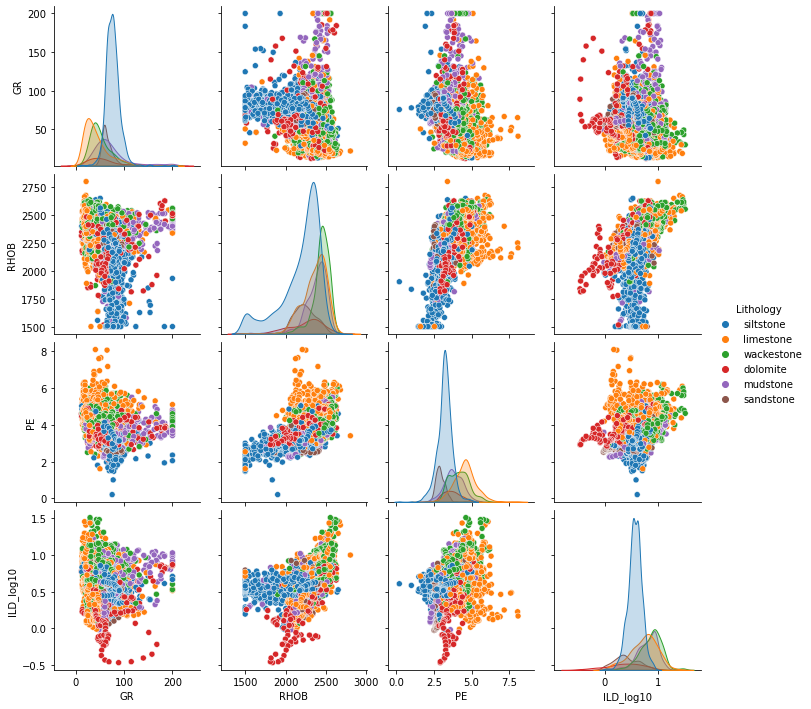

In [226]:
sns.pairplot(df,
             hue="Lithology",
             vars=['GR','RHOB','PE','ILD_log10'])

Let's make the pairgrid again. We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

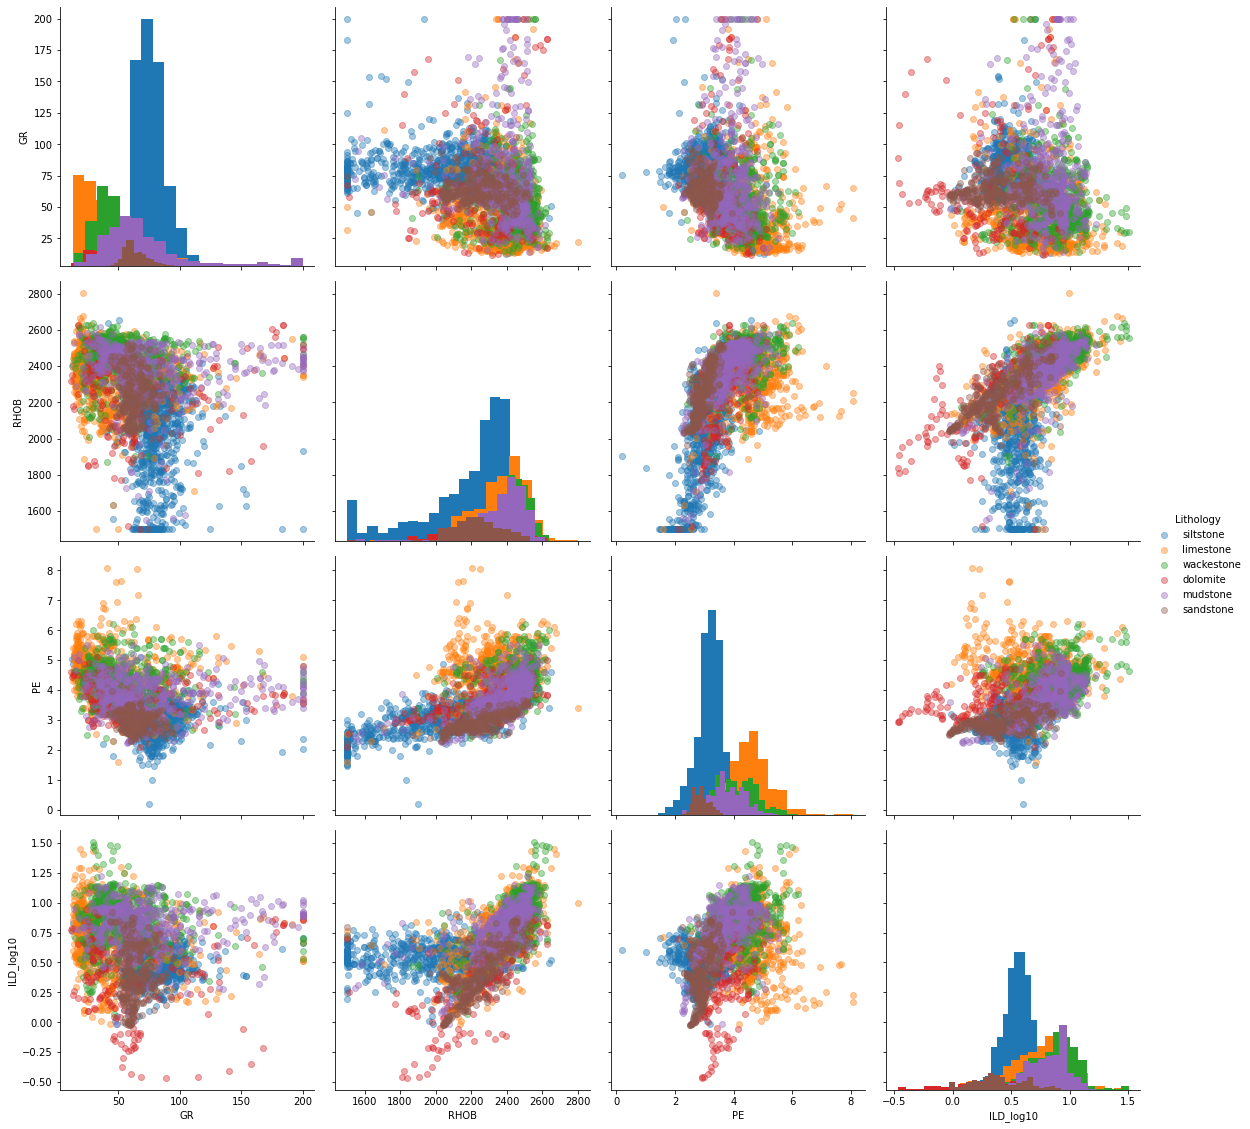

In [227]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithology", vars=['GR','RHOB','PE','ILD_log10'], height=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)
g.add_legend()

We could also simplify even further — we might want to try some different classifications later:

In [228]:
mineralogy = {
     1:'siliciclastic',
     2:'siliciclastic', 3:'siliciclastic',
     4:'siliciclastic', 5:'siliciclastic',
     6:'carbonate',
     7:'carbonate',
     8:'carbonate', 9:'carbonate',
}

In [229]:
df["Mineralogy"] = df["Facies"].map(mineralogy)  # Basically the same as replace, but simpler interface.

/tmp/ipykernel_116526/1072163776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mineralogy"] = df["Facies"].map(mineralogy)  # Basically the same as replace, but simpler interface.


Or, we could cast this as a binary class: **siliciclastic** or not. I think this would be the preferred approach.

In [230]:
siliciclastic = [1, 2, 3, 4, 5]

df['Siliciclastic'] = df['Facies'].isin(siliciclastic)

df.head()

/tmp/ipykernel_116526/3565958913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Siliciclastic'] = df['Facies'].isin(siliciclastic)


,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,Lithology,RHOB,Mineralogy,Siliciclastic
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305,0.664,siltstone,2393.499945,siliciclastic,True
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305,0.661,siltstone,2416.119814,siliciclastic,True
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305,0.658,siltstone,2404.576056,siliciclastic,True
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305,0.655,siltstone,2393.249071,siliciclastic,True
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305,0.647,siltstone,2382.602601,siliciclastic,True


Now we can look at the problem from that point of view:

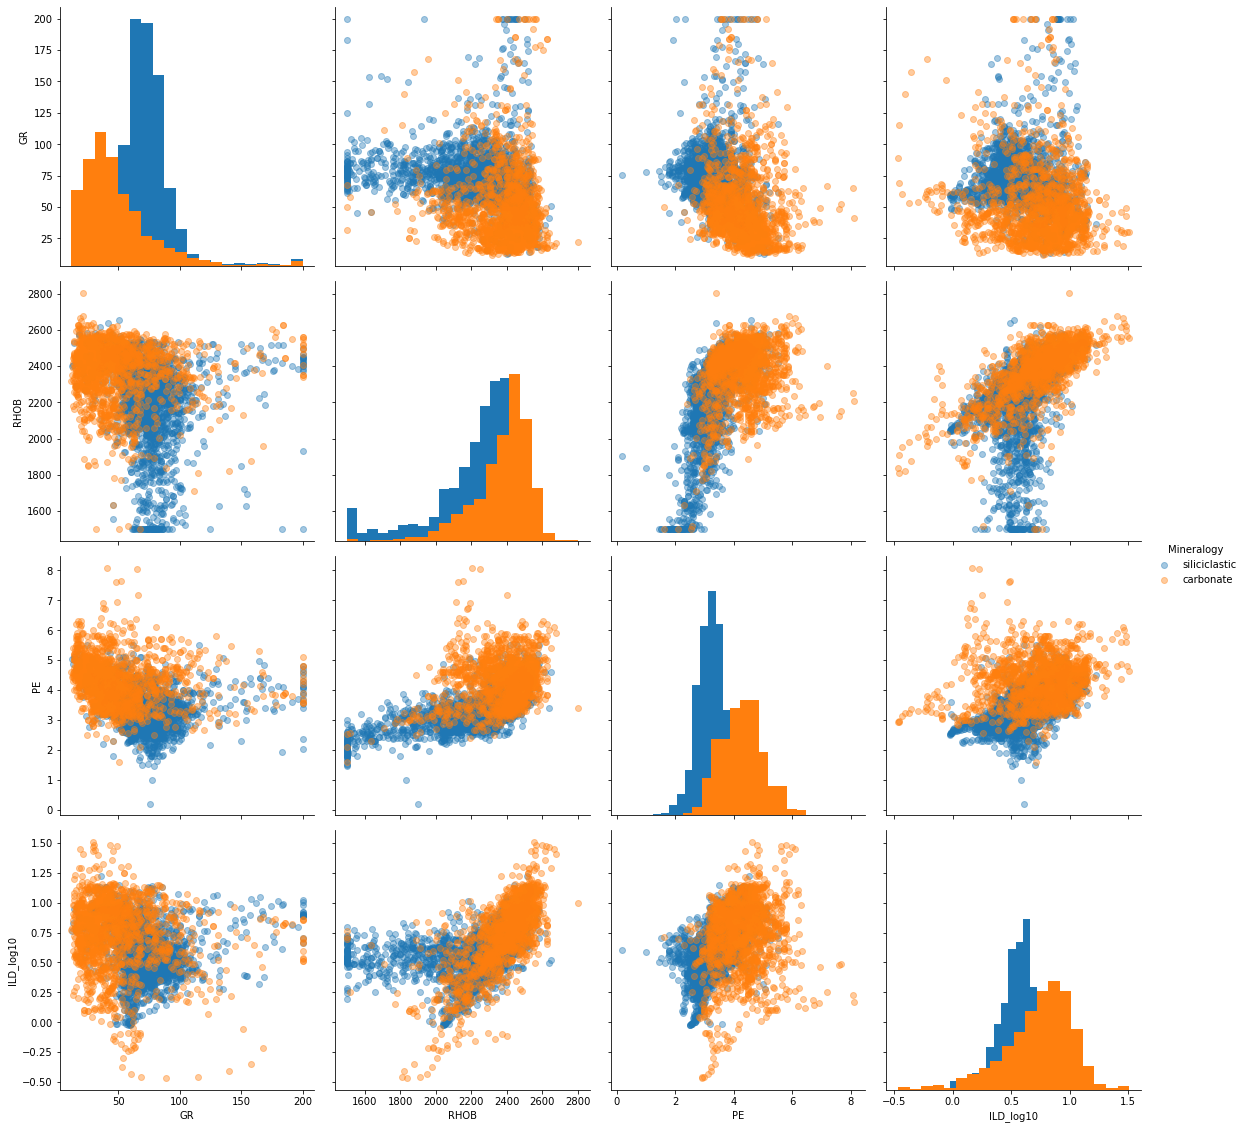

In [231]:
g = sns.PairGrid(df, hue="Mineralogy", vars=['GR','RHOB','PE','ILD_log10'], height=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)
g.add_legend()

Let's see what we've got now:

In [232]:
df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,Lithology,RHOB,Mineralogy,Siliciclastic
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305,0.664,siltstone,2393.499945,siliciclastic,True
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305,0.661,siltstone,2416.119814,siliciclastic,True
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305,0.658,siltstone,2404.576056,siliciclastic,True
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305,0.655,siltstone,2393.249071,siliciclastic,True
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305,0.647,siltstone,2382.602601,siliciclastic,True


In [233]:
df.to_csv("../data/Panoma_training_data.csv", index=False)

In [234]:
# df.to_csv("/local/S3/geocomp/data/Panoma_training_data.csv", index=False)

## Data loading pipeline: method chaining

Running the data processing commands in this notebook is a bit inconvenient, because they are spread through the notebook, interspersed with various other things like plots and commentary.

It's probably a good idea to move all the important bits out to a data preparation script you can run on its own, and/or build it all into a single `pandas` data loading command. Here's how you can do that:

In [237]:
def rescale_and_clip(df):
    """Apply a log transform to resisitivity."""
    df['ILD_log10'] = np.log10(df["ILD"])
    df['GR'] = df['GR'].clip(upper=200)
    df['RHOB'] = df['RHOB'].clip(lower=1500)
    return df

lithologies = {1:'sandstone', 2:'siltstone', 3:'siltstone',
               4:'mudstone', 5:'mudstone', 6:'wackestone',
               7:'dolomite', 8:'limestone', 9:'limestone'}

siliciclastic = [1, 2, 3, 4, 5]

# Read and parse the data. Be careful not to refer to df in here!
url = "https://geocomp.s3.amazonaws.com/data/Panoma_Field_Permian_data.csv"
df = (pd.read_csv(url)
        .assign(RHOB=lambda x: calc_rhob(calc_phi_rhob(x['PHIND'], x['DeltaPHI'])))
        .pipe(rescale_and_clip)
        .assign(lithology=lambda x: pd.Categorical(x['Facies'].map(lithologies)),
                siliciclastic=lambda x: x['Facies'].isin(siliciclastic),
                **{'Well Name': (lambda x: pd.Categorical(x['Well Name']))}
               )
        .drop(columns=['Formation', 'ILD', 'PHIND', 'DeltaPHI', 'Marine', 'RelPos', 'Facies'])
     )

df.head()

,Well Name,Depth,GR,PE,RHOB,ILD_log10,lithology,siliciclastic
0,SHRIMPLIN,851.3064,77.45,4.6,2393.499945,0.664,siltstone,True
1,SHRIMPLIN,851.4588,78.26,4.1,2416.119814,0.661,siltstone,True
2,SHRIMPLIN,851.6112,79.05,3.6,2404.576056,0.658,siltstone,True
3,SHRIMPLIN,851.7636,86.10,3.5,2393.249071,0.655,siltstone,True
4,SHRIMPLIN,851.9160,74.58,3.4,2382.602601,0.647,siltstone,True


In [238]:
df.dtypes

Well Name        category
Depth             float64
GR                float64
PE                float64
RHOB              float64
ILD_log10         float64
lithology        category
siliciclastic        bool
dtype: object

<hr />

<p style="color:gray">©2020 Agile Geoscience. Licensed CC-BY.</p>